## COMMONVOICE DATA

In [31]:
import os
import sys
sys.path.append(os.path.abspath("../src"))  # zodat Python src als modulepad herkent
from analysis import extract_pos_tag_scores
from analysis import load_file, compare_bleu_buckets
from better_by import (
    load_pickle, classify_sentences,
    extract_pos, extract_entities, plot_distribution
)
import pandas as pd
import matplotlib.pyplot as plt 

## BLUE BUCKET ANALYSE PER SENTENCE

In [32]:
# Load data 
data_dir = "/Users/sedatgunay/Desktop/compare-mt-2/commonvoice/"
ref_path = os.path.join(data_dir, "common_test_ref_texts.txt")
knn_path = os.path.join(data_dir, "common_test_knn_texts.txt")
van_path = os.path.join(data_dir, "common_test_van_texts.txt")

# 📄 3. Laad bestanden
refs = load_file(ref_path)
knn = load_file(knn_path)
van = load_file(van_path)

# ✅ Controle: gelijke lengte
assert len(refs) == len(knn) == len(van), "Lengtes van de bestanden komen niet overeen."

# 📊 4. BLEU-bucket edges instellen
bucket_edges = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]

df_bleu = compare_bleu_buckets(refs, knn, van, bucket_edges)

df_bleu.style.background_gradient(cmap="RdYlGn", subset=["Verschil (sys1 - sys2)"])

,BLEU-bucket,Aantal sys1 - kNN-MT,Aantal sys2 - Vanilla,Verschil (sys1 - sys2)
0,"[0.0,10.0)",38,39,-1
1,"[10.0,20.0)",91,74,17
2,"[20.0,30.0)",107,127,-20
3,"[30.0,40.0)",227,204,23
4,"[40.0,50.0)",289,321,-32
5,"[50.0,60.0)",512,546,-34
6,"[60.0,70.0)",549,574,-25
7,"[70.0,80.0)",1007,1044,-37
8,"[80.0,90.0)",639,637,2
9,>=90.0,81,72,9


## POS - BUCKET ANALYSE 

In [33]:
html_path = "/Users/sedatgunay/Desktop/compare-mt-2/commonvoice/comparemt_output_commonvoice_pos/index.html"

print("POS LABEL TAGGING SCORES – COMMONVOICE")
df_commonvoice_pos = extract_pos_tag_scores(html_path)
display(df_commonvoice_pos)

POS LABEL TAGGING SCORES – COMMONVOICE


,Label,kNN-MT (sys1),Vanilla (sys2),Verschil (sys1 - sys2)
0,ADJ,0.9403,0.9374,0.0029
1,NOUN,0.9223,0.9218,0.0005
2,PROPN,0.8276,0.8300,-0.0024
3,VERB,0.9361,0.9375,-0.0014
4,ADV,0.9671,0.9635,0.0036
5,NUM,0.8166,0.6730,0.1436
6,DET,0.9770,0.9774,-0.0004
7,PRON,0.9610,0.9575,0.0035
8,ADP,0.9819,0.9791,0.0028
9,CCONJ,0.9735,0.9709,0.0026


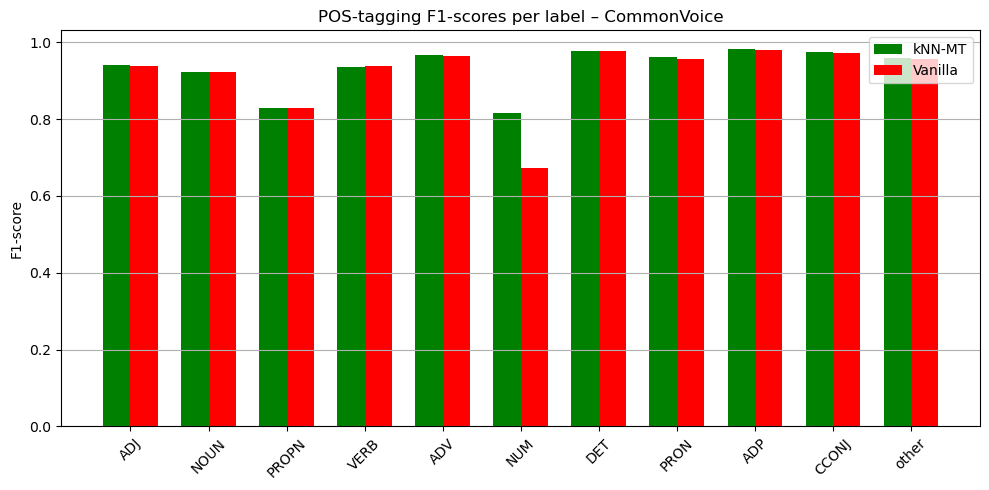

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

labels = df_commonvoice_pos["Label"]
x = range(len(labels))
width = 0.35

ax.bar(x, df_commonvoice_pos["kNN-MT (sys1)"], width, label="kNN-MT", color="green")
ax.bar([i + width for i in x], df_commonvoice_pos["Vanilla (sys2)"], width, label="Vanilla", color="red")

ax.set_ylabel("F1-score")
ax.set_title("POS-tagging F1-scores per label – CommonVoice")
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.legend()
ax.grid(axis="y")
plt.tight_layout()
plt.show()

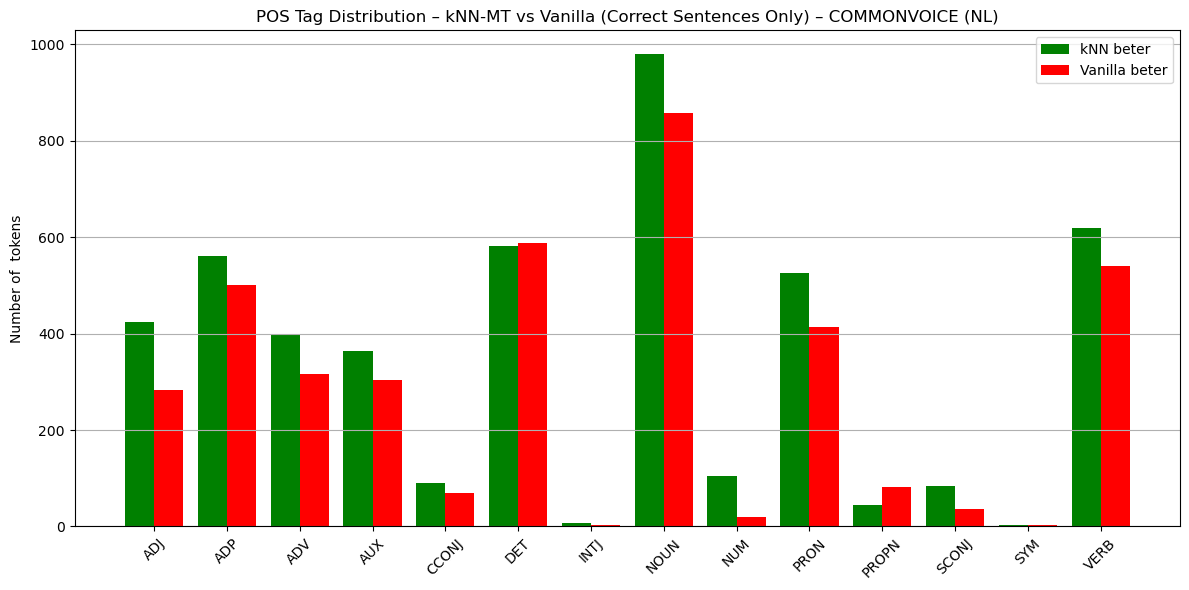

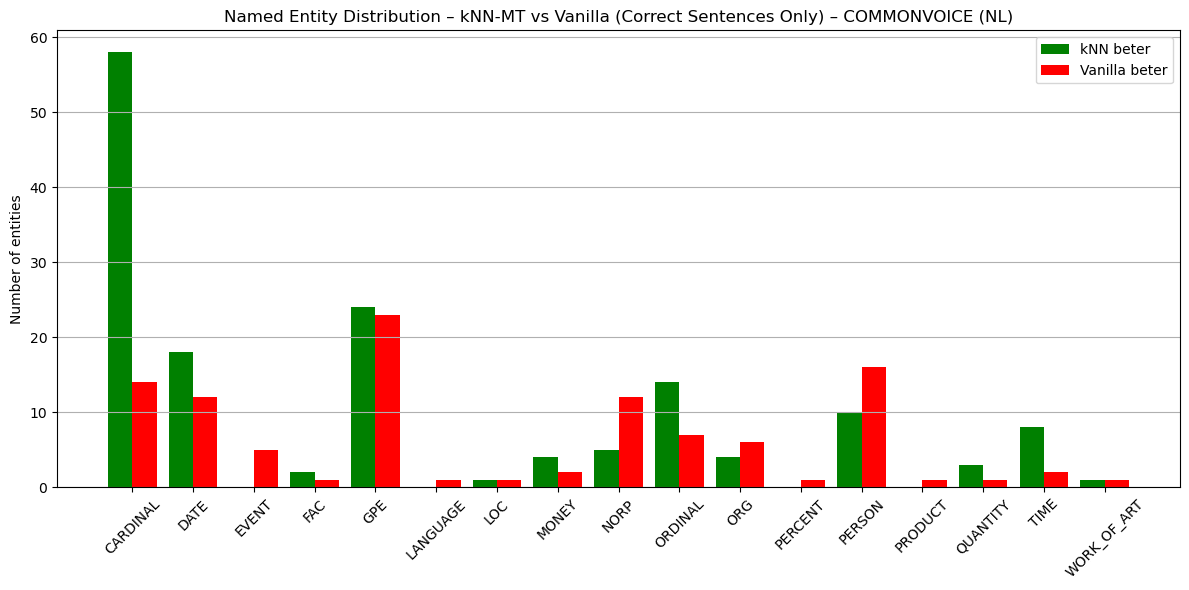

In [36]:
base_path = "/Users/sedatgunay/Desktop/ASR_KNN/dataset data (+outputs)/commonvoice"
lang = "nl"  

# Load data
ref = load_pickle(os.path.join(base_path, "test_ref_texts.pkl"))
knn = load_pickle(os.path.join(base_path, "test_knn_texts.pkl"))
van = load_pickle(os.path.join(base_path, "test_van_texts.pkl"))

# Sort better by sentences on systems 
better_knn, better_van = classify_sentences(ref, knn, van)

# POS-tag analysis
pos_knn = extract_pos(better_knn, lang=lang)
pos_van = extract_pos(better_van, lang=lang)
all_pos = sorted(set(pos_knn.keys()).union(pos_van.keys()))

plot_distribution(
    all_pos,
    [pos_knn.get(p, 0) for p in all_pos],
    [pos_van.get(p, 0) for p in all_pos],
    title=f"POS Tag Distribution – kNN-MT vs Vanilla (Correct Sentences Only) – COMMONVOICE ({lang.upper()})",
    ylabel="Number of  tokens"
)

# Entity-analyse
ent_knn = extract_entities(better_knn, lang=lang)
ent_van = extract_entities(better_van, lang=lang)
all_ents = sorted(set(ent_knn.keys()).union(ent_van.keys()))

plot_distribution(
    all_ents,
    [ent_knn.get(e, 0) for e in all_ents],
    [ent_van.get(e, 0) for e in all_ents],
    title=f"Named Entity Distribution – kNN-MT vs Vanilla (Correct Sentences Only) – COMMONVOICE ({lang.upper()})",
    ylabel="Number of entities"
)